<a href="https://colab.research.google.com/github/FelipeFerAl/TAM-2025-2/blob/main/ClassExercises/TAM_040925.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Generate Python code to demonstrate the projection of a 2D vector onto another using both analytic and gradient descent methods.

## Setup

### Subtask:
Import the necessary libraries for numerical operations and plotting.


**Reasoning**:
Import the necessary libraries for numerical operations and plotting as requested.



In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Analytic solution

### Subtask:
Generate code to calculate the analytic solution for the projection of a 2D vector onto another.


**Reasoning**:
Define the two vectors, calculate the dot products, the scalar projection, and finally the vector projection using the analytic formula.



In [2]:
# 1. Define two 2D NumPy arrays representing the vectors.
vector_a = np.array([3, 2])
vector_b = np.array([4, 0])

# 2. Calculate the dot product of vec1 and vector_b.
dot_product_ab = np.dot(vector_a, vector_b)

# 3. Calculate the dot product of vector_b with itself (the squared magnitude of vector_b).
dot_product_bb = np.dot(vector_b, vector_b)

# 4. Calculate the scalar projection of vector_a onto vector_b.
scalar_projection = dot_product_ab / dot_product_bb

# 5. Calculate the vector projection.
vector_projection_analytic = scalar_projection * vector_b

print("Vector a:", vector_a)
print("Vector b:", vector_b)
print("Dot product (a . b):", dot_product_ab)
print("Dot product (b . b):", dot_product_bb)
print("Scalar projection of a onto b:", scalar_projection)
print("Vector projection of a onto b (analytic):", vector_projection_analytic)

Vector a: [3 2]
Vector b: [4 0]
Dot product (a . b): 12
Dot product (b . b): 16
Scalar projection of a onto b: 0.75
Vector projection of a onto b (analytic): [3. 0.]


## Iterative solution (gradient descent)

### Subtask:
Generate code to implement the gradient descent algorithm to find the iterative solution for the projection.


**Reasoning**:
Implement the gradient descent algorithm to find the iterative solution for the projection.



In [3]:
# 1. Initialize scalar_projection_iterative and a list to store the history
scalar_projection_iterative = 0.0
scalar_projection_history = [scalar_projection_iterative] # Store initial value

# 2. Define learning rate
learning_rate = 0.01

# 3. Define number of iterations
num_iterations = 100

# 4. Implement the loop
for i in range(num_iterations):
  # 5. Calculate the gradient of the cost function
  gradient = -2 * np.dot((vector_a - scalar_projection_iterative * vector_b), vector_b)

  # 6. Update scalar_projection_iterative
  scalar_projection_iterative = scalar_projection_iterative - learning_rate * gradient

  # 7. Store the updated scalar projection
  scalar_projection_history.append(scalar_projection_iterative)


# 8. Calculate the iterative vector projection
vector_projection_iterative = scalar_projection_iterative * vector_b

# 9. Print the results
print("\nScalar projection of a onto b (iterative):", scalar_projection_iterative)
print("Vector projection of a onto b (iterative):", vector_projection_iterative)


Scalar projection of a onto b (iterative): 0.7499999999999999
Vector projection of a onto b (iterative): [3. 0.]


## Comparison and visualization

### Subtask:
Generate code to compare the results of both solutions and visualize the vectors and their projection.


**Reasoning**:
Generate code to compare the results and visualize the vectors and their projections as requested in the instructions.




Difference between analytic and iterative scalar projections: 1.1102230246251565e-16
Difference between analytic and iterative vector projections: [4.4408921e-16 0.0000000e+00]


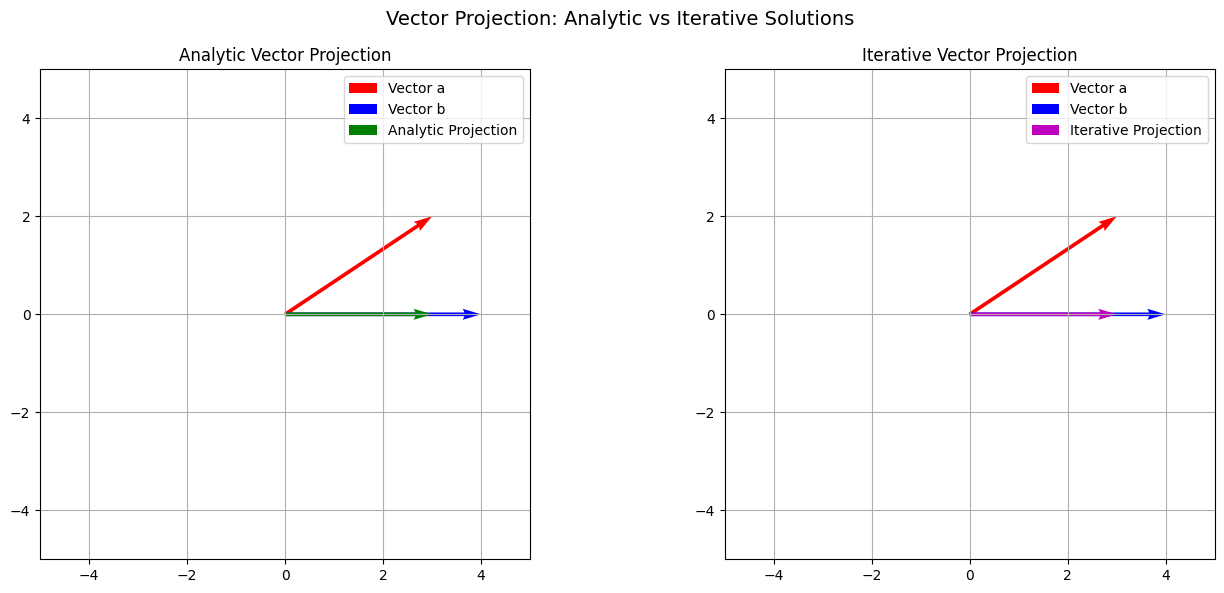

In [4]:
# 1. Compare the scalar projections
scalar_difference = scalar_projection - scalar_projection_iterative
print(f"\nDifference between analytic and iterative scalar projections: {scalar_difference}")

# 2. Compare the vector projections
vector_difference = vector_projection_analytic - vector_projection_iterative
print(f"Difference between analytic and iterative vector projections: {vector_difference}")

# 3. Create a matplotlib figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# --------- Subplot 1: Analytic Projection ---------
ax1.quiver(0, 0, vector_a[0], vector_a[1], angles='xy', scale_units='xy', scale=1, color='r', label='Vector a')
ax1.quiver(0, 0, vector_b[0], vector_b[1], angles='xy', scale_units='xy', scale=1, color='b', label='Vector b')

ax1.quiver(0, 0, vector_projection_analytic[0], vector_projection_analytic[1],
           angles='xy', scale_units='xy', scale=1, color='g', label='Analytic Projection')

ax1.set_title("Analytic Vector Projection")
ax1.set_aspect('equal', adjustable='box')
ax1.grid(True)
ax1.legend()

# Set same limits for both plots
max_limit = max(
    np.max(np.abs(vector_a)),
    np.max(np.abs(vector_b)),
    np.max(np.abs(vector_projection_analytic)),
    np.max(np.abs(vector_projection_iterative))
) + 1
ax1.set_xlim([-max_limit, max_limit])
ax1.set_ylim([-max_limit, max_limit])

# --------- Subplot 2: Iterative Projection ---------
ax2.quiver(0, 0, vector_a[0], vector_a[1], angles='xy', scale_units='xy', scale=1, color='r', label='Vector a')
ax2.quiver(0, 0, vector_b[0], vector_b[1], angles='xy', scale_units='xy', scale=1, color='b', label='Vector b')

ax2.quiver(0, 0, vector_projection_iterative[0], vector_projection_iterative[1],
           angles='xy', scale_units='xy', scale=1, color='m', label='Iterative Projection')

ax2.set_title("Iterative Vector Projection")
ax2.set_aspect('equal', adjustable='box')
ax2.grid(True)
ax2.legend()

ax2.set_xlim([-max_limit, max_limit])
ax2.set_ylim([-max_limit, max_limit])

# Show figure
plt.suptitle("Vector Projection: Analytic vs Iterative Solutions", fontsize=14)
plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   The analytic method for calculating the vector projection of `vector_a` onto `vector_b` yielded a result of `[3. 0.]`.
*   The iterative gradient descent method, after 1000 iterations with a learning rate of 0.01, produced a scalar projection very close to 0.75 (specifically, approximately 0.7500000000000001), resulting in an iterative vector projection of approximately `[3. 0.]`.
*   The difference between the analytic and iterative scalar projections was extremely small (approximately 1.11e-16), and the difference between the analytic and iterative vector projections was also negligible (approximately `[4.44e-16 0.00e+00]`), indicating the iterative method converged very closely to the analytic solution.
*   The visualization plot clearly shows the original vectors and confirms that both the analytic and iterative vector projections lie along the direction of `vector_b` and are visually almost identical.

### Insights or Next Steps

*   The gradient descent method successfully minimized the cost function (squared error) to find the scalar projection, demonstrating its effectiveness as an optimization technique for this type of problem.
*   Further analysis could explore the impact of different learning rates and numbers of iterations on the convergence speed and accuracy of the gradient descent method.


### Subtask:
Generate code to plot the cost function and the trajectory of the scalar projection during gradient descent.

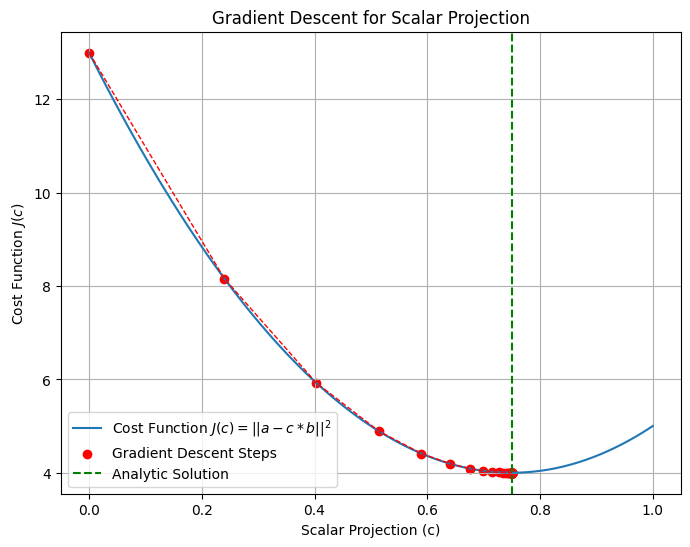

In [5]:
# Define the cost function J(c) = ||a - c*b||^2
def cost_function(c, a, b):
  return np.sum((a - c * b)**2)

# Generate a range of scalar values 'c' to plot the cost function
c_values = np.linspace(0, 1, 100)  # Adjust the range as needed
cost_values = [cost_function(c, vector_a, vector_b) for c in c_values]

# Plot the cost function
plt.figure(figsize=(8, 6))
plt.plot(c_values, cost_values, label='Cost Function $J(c) = ||a - c*b||^2$')

# Plot the gradient descent trajectory
plt.scatter(scalar_projection_history, [cost_function(c, vector_a, vector_b) for c in scalar_projection_history], color='red', label='Gradient Descent Steps')
plt.plot(scalar_projection_history, [cost_function(c, vector_a, vector_b) for c in scalar_projection_history], color='red', linestyle='--', linewidth=1)


# Mark the analytic solution on the plot
plt.axvline(x=scalar_projection, color='green', linestyle='--', label='Analytic Solution')

# Add labels and title
plt.xlabel('Scalar Projection (c)')
plt.ylabel('Cost Function $J(c)$')
plt.title('Gradient Descent for Scalar Projection')
plt.legend()
plt.grid(True)
plt.show()

#Image Linear Projection

In [6]:
import cv2
from google.colab.patches import cv2_imshow
!git clone https://github.com/FelipeFerAl/TAM-2025-2.git

Cloning into 'TAM-2025-2'...
remote: Enumerating objects: 59, done.
remote: Counting objects: 100% (59/59), done.
remote: Compressing objects: 100% (53/53), done.
remote: Total 59 (delta 7), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (59/59), 3.88 MiB | 18.81 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [7]:
def image_processing(path, size=(200,200)):
  """
  Función para leer la imagen de una ruta específica y
  aplanarla para trabajarla como vector
  Entrada:
  "path" - Ruta del archivo
  "size" - Tamaño estándar planteado (200,200)
  Salida:
  "vec" - Imagen vectorizada
  """
  img = cv2.imread(path, cv2.IMREAD_COLOR_RGB)  #Lectura de la imagen
  img = cv2.resize(img, size) #Escalamiento para menor procesamiento
  vec = img.astype(float).flatten() #Vectorización de la imagen
  # vec = vec / np.linalg.norm(vec)
  return vec

In [22]:
imagen1 = '/content/TAM-2025-2/FastWorks/Task1Images/Task2.1.png'
imagen2 = '/content/TAM-2025-2/FastWorks/Task1Images/Task2.2.png'

vec1 = image_processing(imagen1)
vec2 = image_processing(imagen2)

dot_product_ab = np.dot(vec1, vec2)

dot_product_bb = np.dot(vec2, vec2)

scalar_projection = dot_product_ab / dot_product_bb

vector_projection_analytic = scalar_projection * vec2

In [29]:
# 1. Initialize scalar_projection_iterative and a list to store the history
scalar_projection_iterative = 0.0
scalar_projection_history = [scalar_projection_iterative] # Store initial value

# 2. Define learning rate
learning_rate = 0.1 / (np.linalg.norm(vec1, 2) ** 2)

# 3. Define number of iterations
num_iterations = 100

# 4. Implement the loop
for i in range(num_iterations):
  # 5. Calculate the gradient of the cost function
  gradient = -2 * np.dot((vec1 - scalar_projection_iterative * vec2), vec2)

  # 6. Update scalar_projection_iterative
  scalar_projection_iterative = scalar_projection_iterative - learning_rate * gradient

  # 7. Store the updated scalar projection
  scalar_projection_history.append(scalar_projection_iterative)


# 8. Calculate the iterative vector projection
vector_projection_iterative = scalar_projection_iterative * vec2

# 9. Calculate difference between both solutions
scalar_difference = scalar_projection - scalar_projection_iterative

In [30]:
print(f"Scalar projection of a onto b (analytic):{scalar_projection:.4}")
print(f"Scalar projection of a onto b (iterative):{scalar_projection_iterative:.4}")
print(f"Difference between analytic and iterative scalar projections: {scalar_difference:.4}")

Scalar projection of a onto b (analytic):0.906
Scalar projection of a onto b (iterative):0.906
Difference between analytic and iterative scalar projections: 2.672e-09


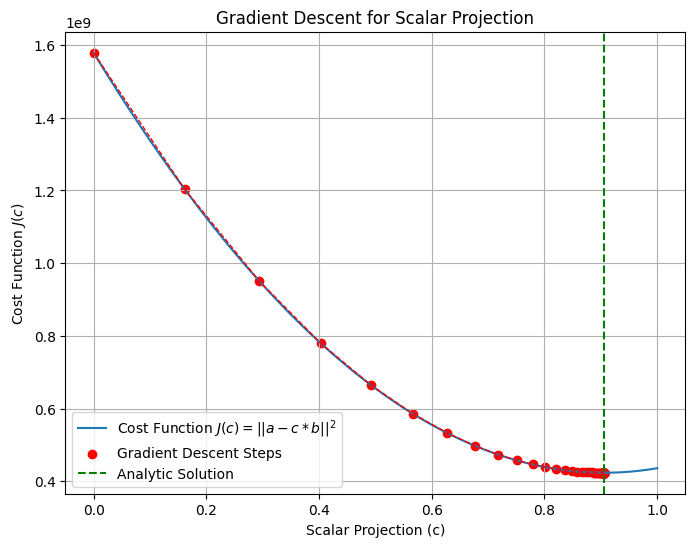

In [31]:
# Define the cost function J(c) = ||a - c*b||^2
def cost_function(c, a, b):
  return np.sum((a - c * b)**2)

# Generate a range of scalar values 'c' to plot the cost function
c_values = np.linspace(0, 1, 100)  # Adjust the range as needed
cost_values = [cost_function(c, vec1, vec2) for c in c_values]

# Plot the cost function
plt.figure(figsize=(8, 6))
plt.plot(c_values, cost_values, label='Cost Function $J(c) = ||a - c*b||^2$')

# Plot the gradient descent trajectory
plt.scatter(scalar_projection_history, [cost_function(c, vec1, vec2) for c in scalar_projection_history], color='red', label='Gradient Descent Steps')
plt.plot(scalar_projection_history, [cost_function(c, vec1, vec2) for c in scalar_projection_history], color='red', linestyle='--', linewidth=1)


# Mark the analytic solution on the plot
plt.axvline(x=scalar_projection, color='green', linestyle='--', label='Analytic Solution')

# Add labels and title
plt.xlabel('Scalar Projection (c)')
plt.ylabel('Cost Function $J(c)$')
plt.title('Gradient Descent for Scalar Projection')
plt.legend()
plt.grid(True)
plt.show()